In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [231]:
df = pd.read_csv("vgsales_data.csv")
data = df

In [232]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [219]:
Data_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [220]:
data_with_outlier = Data_sale[["NA_Sales","EU_Sales","JP_Sales", "Global_Sales"]]
data_with_outlier.head()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,41.49,29.02,3.77,82.74
1,29.08,3.58,6.81,40.24
2,15.85,12.88,3.79,35.82
3,15.75,11.01,3.28,33.00
4,11.27,8.89,10.22,31.37


In [221]:
class Data_overviwe():
    def info_over(self,data):
        self.df = data
        self.info1 = pd.DataFrame(self.df.dtypes)
        self.info2 = pd.DataFrame(self.df.isnull().sum())
        self.corr = pd.DataFrame(self.df.mean())
        self.info4 = pd.DataFrame(self.df.std())
        self.info5 = pd.DataFrame(self.df.median())
        self.max = pd.DataFrame(self.df.max())
        self.upper_limit = pd.DataFrame(self.df.quantile(0.75)+ 1.5*(self.df.quantile(0.75)-self.df.quantile(0.25)))
        self.lower_limit = pd.DataFrame(self.df.quantile(0.25)- 1.5*(self.df.quantile(0.75)-self.df.quantile(0.25)))
        self.min = pd.DataFrame(self.df.min())
        self.info = pd.concat([self.info1,self.info2,self.corr,self.info4,self.info5,self.max,self.upper_limit,self.lower_limit,self.min],axis =1)
        self.info.columns = ["Data_type","Null_value","Mean","Std_Deviation","Median","Max","Upper_limit","Lower_limit","Min"]
        return self.info
    def outlier_remove(self):
        for i in self.df.columns:
            self.df[i]= np.where(self.df[i]>self.upper_limit.loc[i,0],self.upper_limit.loc[i,0],self.df[i])
            self.df[i]= np.where(self.df[i]<self.lower_limit.loc[i,0],self.lower_limit.loc[i,0],self.df[i])
#         return DV.info_over(df)
        return self.df
DV = Data_overviwe()
DV.info_over(df)

,Data_type,Null_value,Mean,Std_Deviation,Median,Max,Upper_limit,Lower_limit,Min
Rank,int64,0,8300.605254,4791.853933,8300.50,16600,24897.500,-8296.500,1
Name,object,0,NaN,NaN,NaN,¡Shin Chan Flipa en colores!,NaN,NaN,'98 Koshien
Platform,object,0,NaN,NaN,NaN,XOne,NaN,NaN,2600
Year,float64,271,2006.406443,5.828981,2007.00,2020.0,2020.500,1992.500,1980.0
Genre,object,0,NaN,NaN,NaN,Strategy,NaN,NaN,Action
Publisher,object,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,float64,0,0.264667,0.816683,0.08,41.49,0.600,-0.360,0.0
EU_Sales,float64,0,0.146652,0.505351,0.02,29.02,0.275,-0.165,0.0
JP_Sales,float64,0,0.077782,0.309291,0.00,10.22,0.100,-0.060,0.0
Other_Sales,float64,0,0.048063,0.188588,0.01,10.57,0.100,-0.060,0.0


###  Observation From above output
1). We say that their NA_Sales,EU_sales,JP_Sales, Global_Sales have outliers.                     
2). Two attributes have null values year and Publisher

In [222]:
# We will replace outlier with outlier limit
data_with_outlier = Data_sale[["NA_Sales","EU_Sales","JP_Sales","Other_Sales", "Global_Sales"]]
DV.info_over(data_with_outlier)
data_without_outlier=DV.outlier_remove()
df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales", "Global_Sales"]]=data_without_outlier[["NA_Sales","EU_Sales","JP_Sales","Other_Sales", "Global_Sales"]]   # Removed Outlier from the data

In [223]:
# Now we will fill the null value by Knn Imputer
from sklearn.impute import KNNImputer
fill_null = KNNImputer(missing_values=np.nan,n_neighbors=5)
df["Year"] =pd.DataFrame(fill_null.fit_transform(df[["Year"]]))  # we filled null value of Year

# Now we will remove null value of Plublisher before we should Encode plublisher.
# But null value in plublisher very low so better to drop them because may be matching issue
df.dropna(inplace = True)


1) All null value filled or droped no null value in data.

2) All outliers removed by filling values

In [224]:
# Now we will Encode data 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Year"] = LE.fit_transform(df["Year"])
df["Platform"] = LE.fit_transform(df["Platform"])
df["Genre"] = LE.fit_transform(df["Genre"])
df["Publisher"] = LE.fit_transform(df["Publisher"])
# Now change the data type of all encoded data
df["Year"].astype("int64")
df["Platform"].astype("int64")
df["Genre"].astype("int64")
df["Publisher"].astype("int64")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,26,10,359,0.6,0.275,0.1,0.1,1.085
1,2,Super Mario Bros.,11,5,4,359,0.6,0.275,0.1,0.1,1.085
2,3,Mario Kart Wii,26,29,6,359,0.6,0.275,0.1,0.1,1.085
3,4,Wii Sports Resort,26,30,10,359,0.6,0.275,0.1,0.1,1.085
4,5,Pokemon Red/Pokemon Blue,5,16,7,359,0.6,0.275,0.1,0.1,1.085


In [225]:
df.shape

(16540, 11)

In [226]:
df.corr()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.084184,0.174457,-0.053429,-0.018997,-0.798437,-0.734402,-0.238638,-0.765224,-0.894999
Platform,-0.084184,1.000000,0.164703,0.028287,-0.014520,0.083120,0.114444,-0.097223,0.151618,0.072585
Year,0.174457,0.164703,1.000000,-0.125258,0.028651,-0.125908,-0.003546,-0.119480,0.077441,-0.144708
Genre,-0.053429,0.028287,-0.125258,1.000000,-0.051145,0.021152,-0.001321,0.001950,0.017545,0.040913
Publisher,-0.018997,-0.014520,0.028651,-0.051145,1.000000,-0.020740,0.011952,0.091883,0.018495,0.009149
NA_Sales,-0.798437,0.083120,-0.125908,0.021152,-0.020740,1.000000,0.706344,-0.011052,0.759070,0.877238
EU_Sales,-0.734402,0.114444,-0.003546,-0.001321,0.011952,0.706344,1.000000,0.012168,0.843567,0.809012
JP_Sales,-0.238638,-0.097223,-0.119480,0.001950,0.091883,-0.011052,0.012168,1.000000,0.048755,0.232912
Other_Sales,-0.765224,0.151618,0.077441,0.017545,0.018495,0.759070,0.843567,0.048755,1.000000,0.841419
Global_Sales,-0.894999,0.072585,-0.144708,0.040913,0.009149,0.877238,0.809012,0.232912,0.841419,1.000000


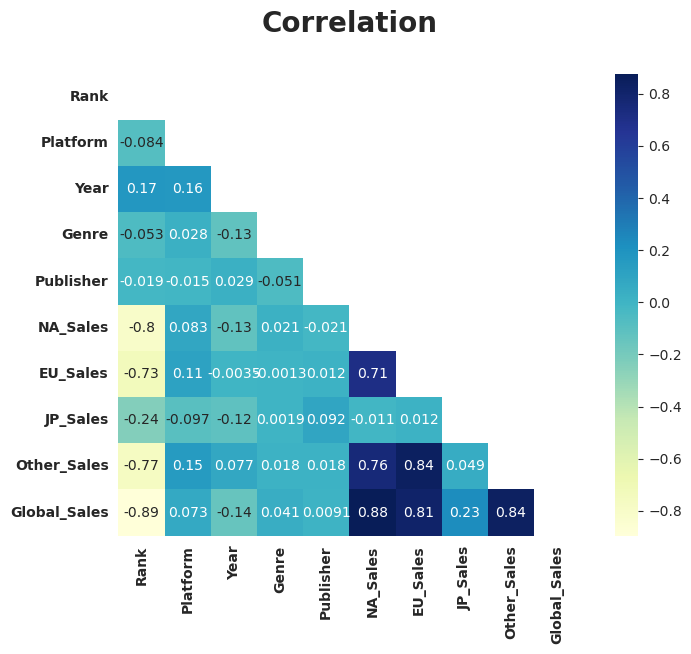

In [227]:
corrmat= df.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9,6))
    plt.title("Correlation", weight="bold", fontsize=20, pad=30) # title
    plt.xticks(weight="bold", fontsize=10) # x-ticks
    plt.yticks(weight="bold", fontsize=10); # y-ticks
    sns.heatmap(corrmat,cmap="YlGnBu",annot=True,mask=mask,square=True )

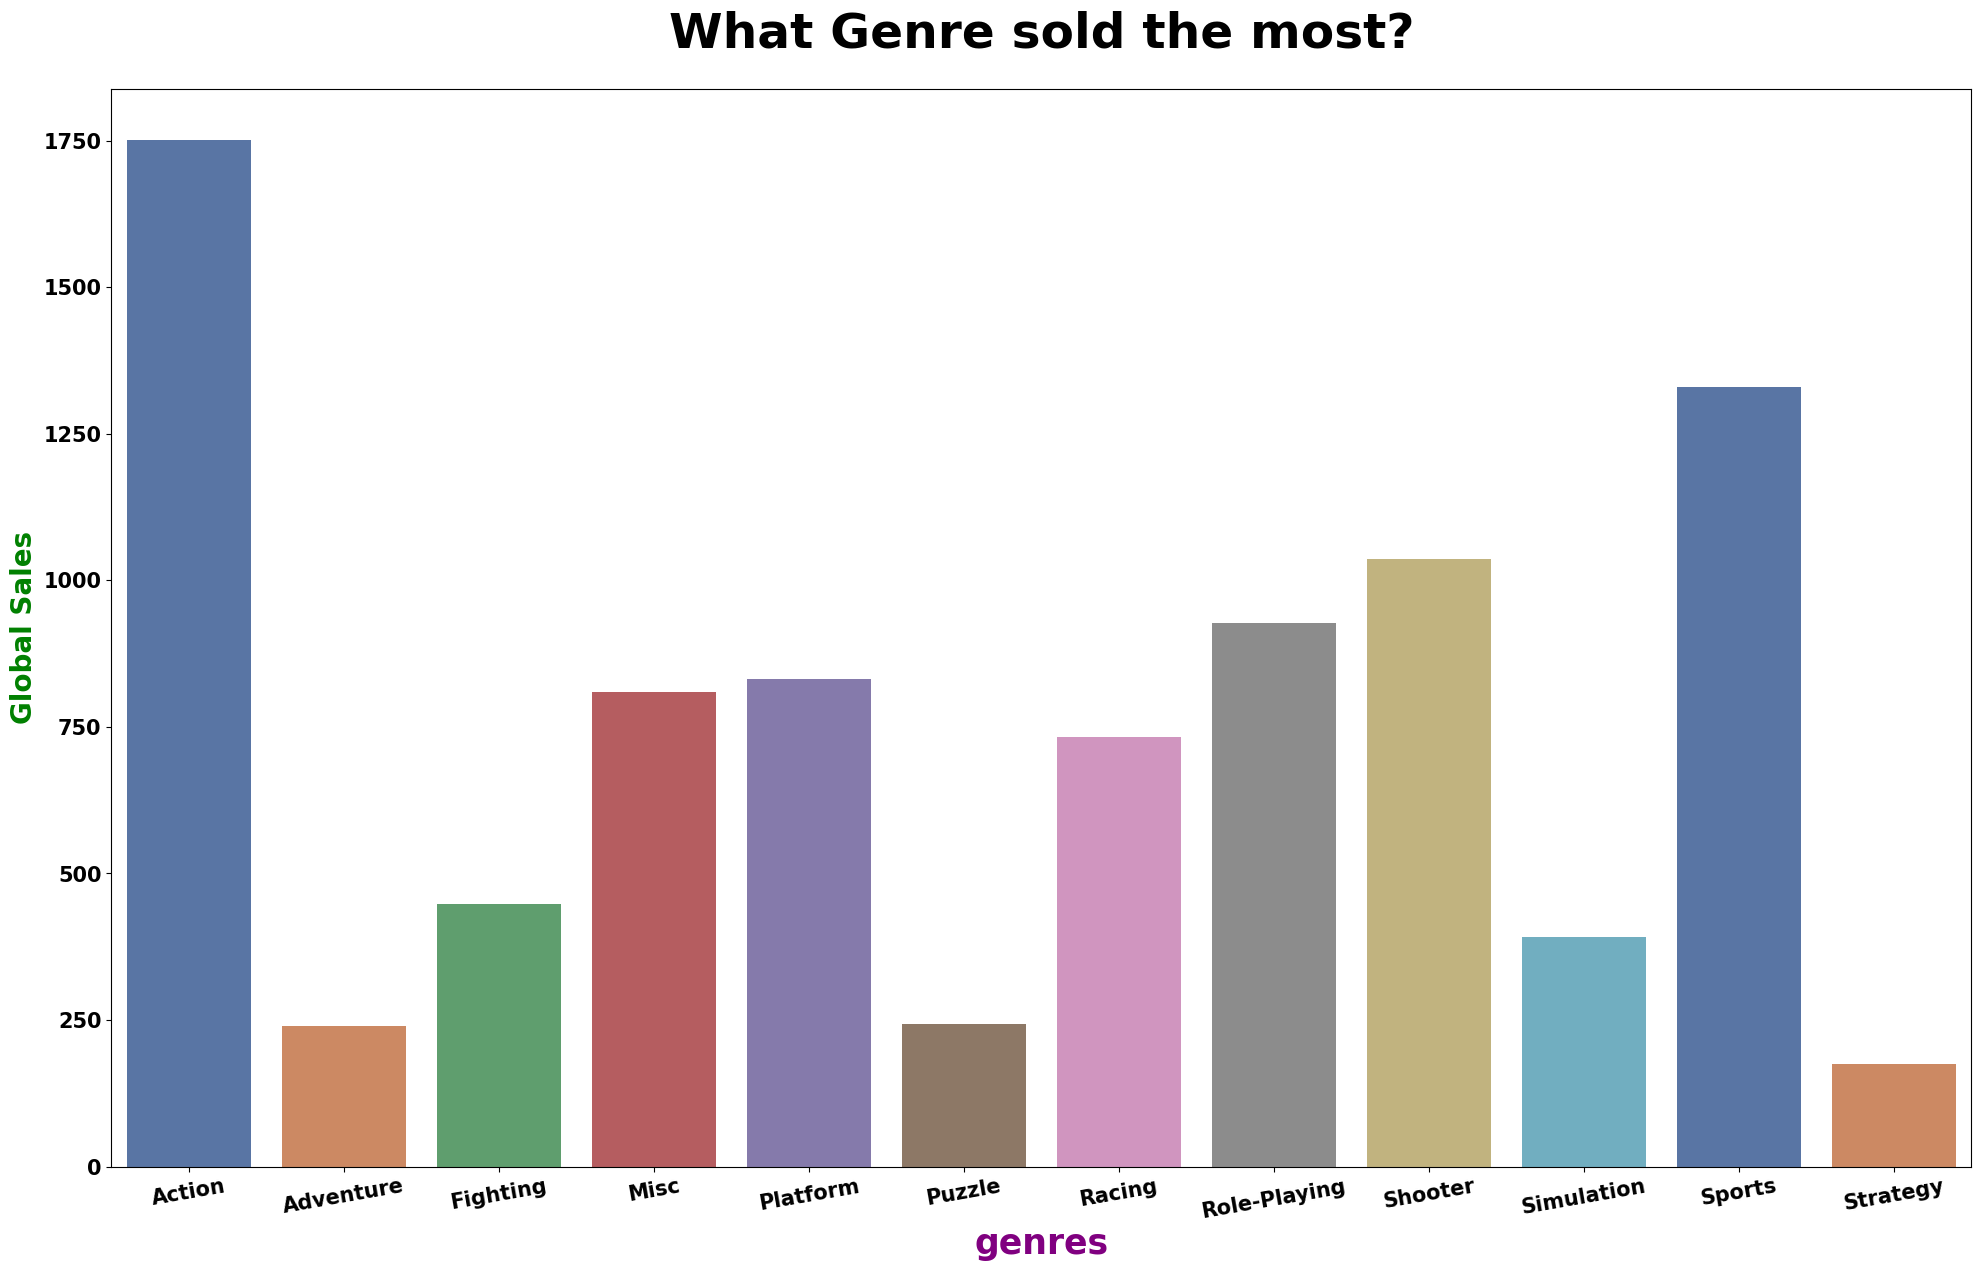

In [238]:
highest_number_of_sales = data.groupby('Genre').sum().astype('int')
plt.figure(figsize=(24, 14))
sns.barplot(x=highest_number_of_sales.index,y=highest_number_of_sales["Global_Sales"],data=highest_number_of_sales,palette="deep")
plt.title("What Genre sold the most?",weight="bold",fontsize=35,pad=30)
plt.xlabel("genres",weight="bold",color="purple",fontsize=25,)
plt.xticks(weight="bold",fontsize=15,rotation=10)
plt.ylabel("Global Sales",weight="bold",color="green",fontsize=20)
plt.yticks(weight="bold",fontsize=15);

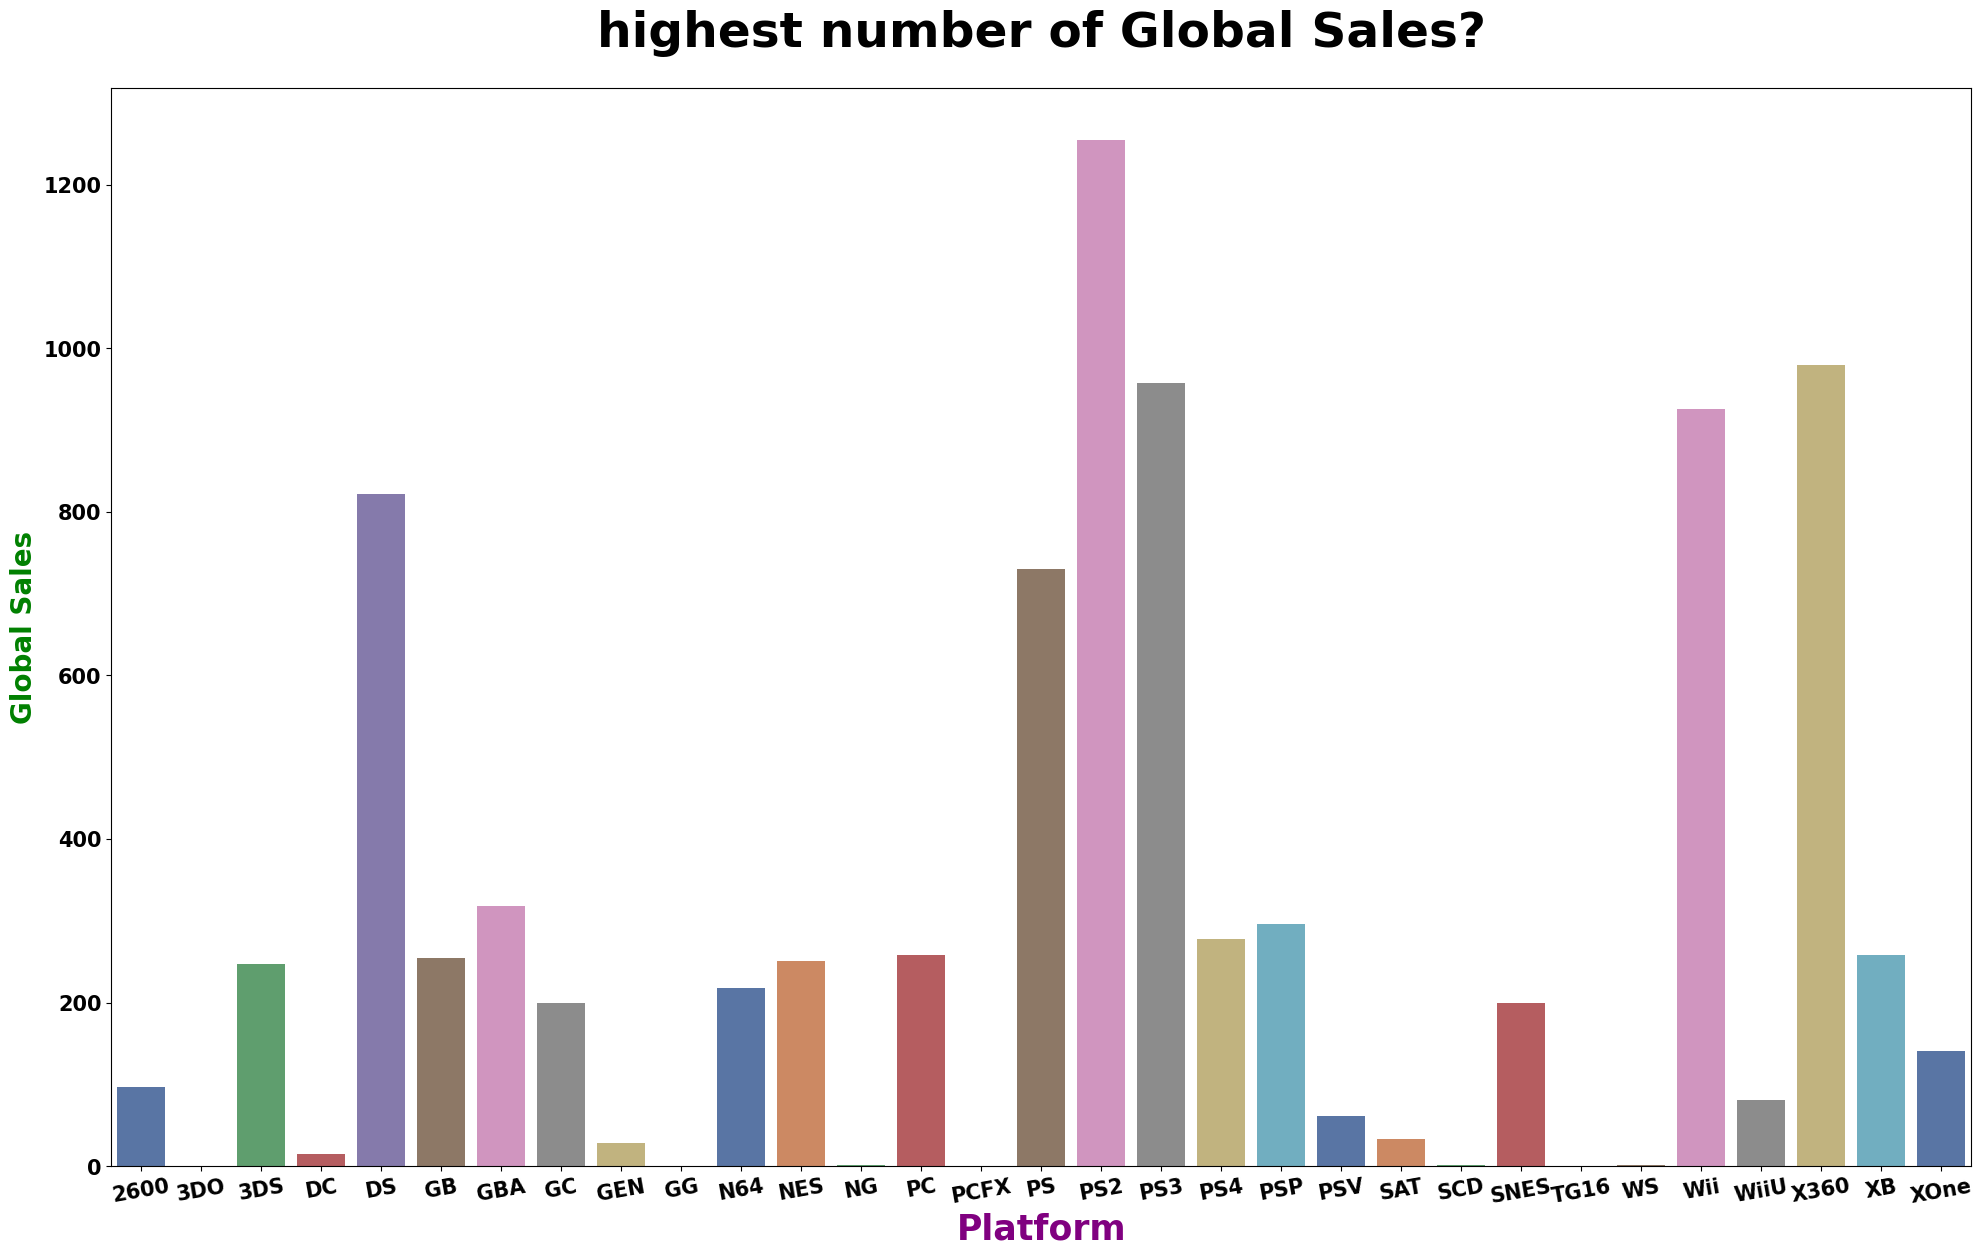

In [237]:
highest_number_of_sales = data.groupby('Platform').sum().astype('int')
plt.figure(figsize=(24, 14))
sns.barplot(x=highest_number_of_sales.index,y=highest_number_of_sales["Global_Sales"],data=highest_number_of_sales,palette="deep" )
plt.title("highest number of Global Sales?",weight="bold",fontsize=35,pad=30)
plt.xlabel("Platform",weight="bold",color="purple",fontsize=25,)
plt.xticks(weight="bold",fontsize=15,rotation=10)
plt.ylabel("Global Sales",weight="bold",color="green",fontsize=20)
plt.yticks(weight="bold",fontsize=15);